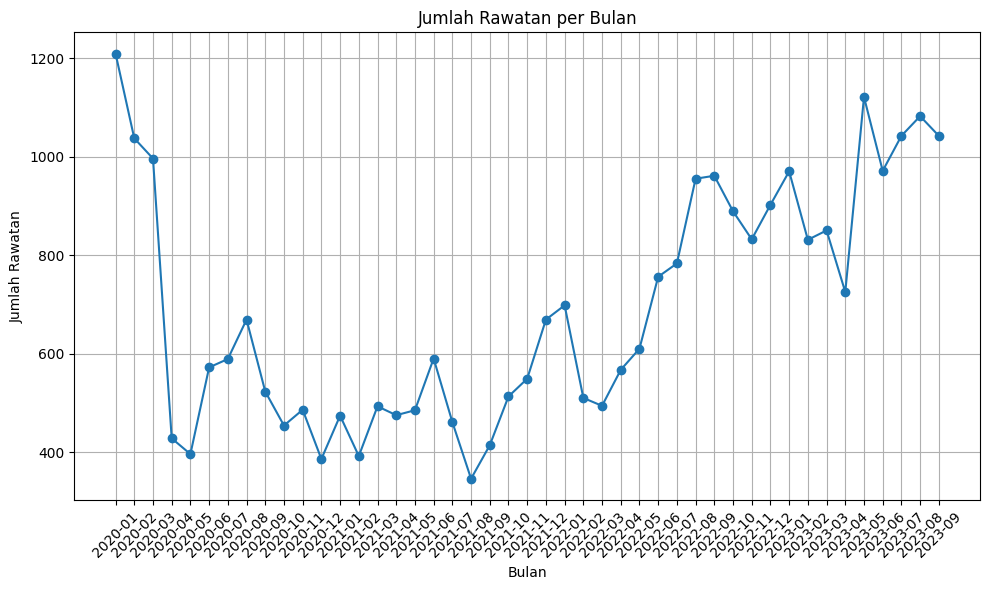

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca file CSV
df = pd.read_csv('fakta_rawatan.csv')

# 2. Ubah format kolom tanggal ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# 3. Hitung jumlah id_rawatan per bulan
df['bulan_tahun'] = df['tanggal'].dt.to_period('M')
data = df.groupby('bulan_tahun').size().reset_index(name='jumlah_rawatan')

# 4. Buat visualisasi line chart
plt.figure(figsize=(10, 6))
plt.plot(data['bulan_tahun'].astype(str), data['jumlah_rawatan'], marker='o', linestyle='-')
plt.title('Jumlah Rawatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.grid(True)

# 5. Tampilkan visualisasi
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


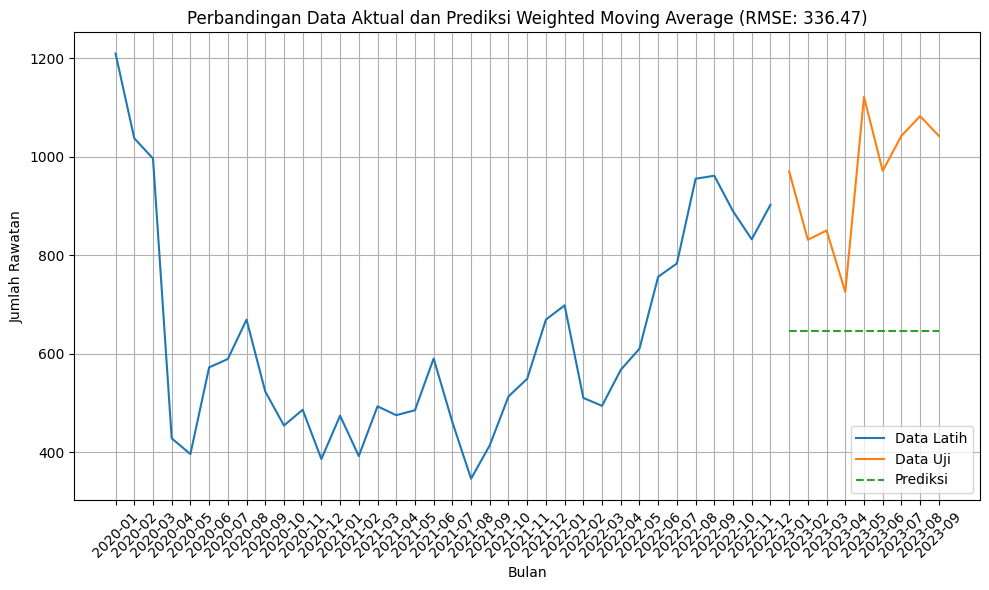

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

# Fungsi untuk menghitung Weighted Moving Average
def weighted_moving_average(data, weights):
    wma = np.convolve(data, weights[::-1], mode='valid') / sum(weights)
    return wma

# 1. Baca file CSV
df = pd.read_csv('fakta_rawatan.csv')

# 2. Ubah format kolom tanggal ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# 3. Hitung jumlah id_rawatan per bulan
df['bulan_tahun'] = df['tanggal'].dt.to_period('M')
data = df.groupby('bulan_tahun').size().reset_index(name='jumlah_rawatan')

# 4. Memisahkan data menjadi data latih dan data uji dengan rasio 80:20
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 5. Menentukan bobot untuk Weighted Moving Average
weights = np.arange(1, len(train) + 1)

# 6. Menghitung Weighted Moving Average untuk data latih
wma_train = weighted_moving_average(train['jumlah_rawatan'], weights)

# 7. Melakukan prediksi pada data uji dengan menggunakan nilai WMA terakhir dari data latih
last_wma_value = wma_train[-1]
forecast = np.full(len(test), last_wma_value)

# 8. Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test['jumlah_rawatan'], forecast))

# 9. Menampilkan perbandingan data aktual dan hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(train['bulan_tahun'].dt.strftime('%Y-%m'), train['jumlah_rawatan'], label='Data Latih')
plt.plot(test['bulan_tahun'].dt.strftime('%Y-%m'), test['jumlah_rawatan'], label='Data Uji')
plt.plot(test['bulan_tahun'].dt.strftime('%Y-%m'), forecast, label='Prediksi', linestyle='--')
plt.title('Perbandingan Data Aktual dan Prediksi Weighted Moving Average (RMSE: {:.2f})'.format(rmse))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


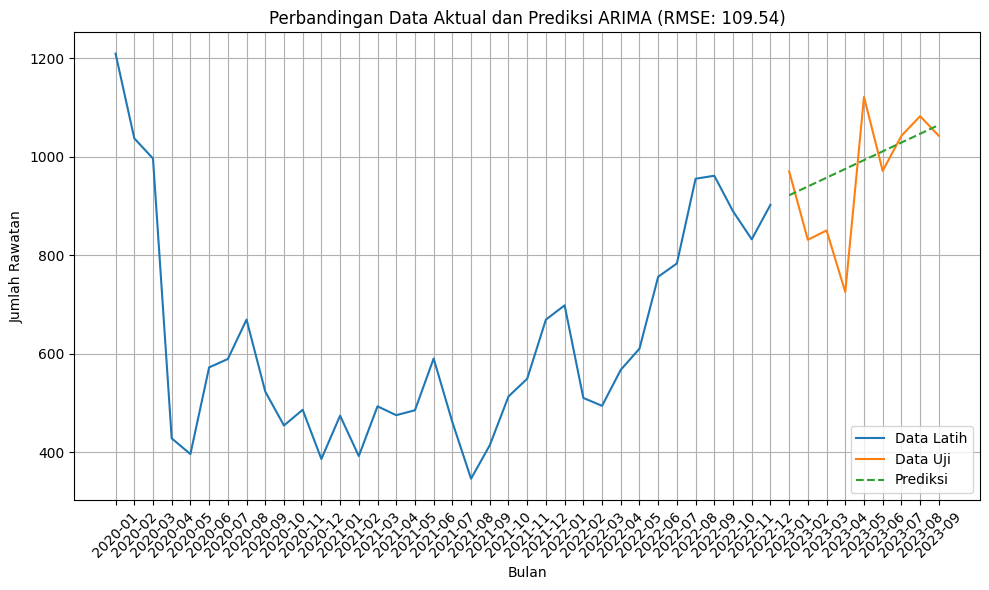

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Baca file CSV
df = pd.read_csv('fakta_rawatan.csv')

# 2. Ubah format kolom tanggal ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# 3. Hitung jumlah id_rawatan per bulan
df['bulan_tahun'] = df['tanggal'].dt.to_period('M')
data = df.groupby('bulan_tahun').size().reset_index(name='jumlah_rawatan')

# 4. Memisahkan data menjadi data latih dan data uji dengan rasio 80:20
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 5. Melatih model ARIMA
model = ARIMA(train['jumlah_rawatan'], order=(1, 2, 1))
model_fit = model.fit()

# 6. Melakukan prediksi pada data uji
forecast = model_fit.forecast(steps=len(test))

# 7. Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test['jumlah_rawatan'], forecast))

# 8. Menampilkan perbandingan data aktual dan hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(train['bulan_tahun'].dt.strftime('%Y-%m'), train['jumlah_rawatan'], label='Data Latih')
plt.plot(test['bulan_tahun'].dt.strftime('%Y-%m'), test['jumlah_rawatan'], label='Data Uji')
plt.plot(test['bulan_tahun'].dt.strftime('%Y-%m'), forecast, label='Prediksi', linestyle='--')
plt.title('Perbandingan Data Aktual dan Prediksi ARIMA (RMSE: {:.2f})'.format(rmse))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\hanif\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


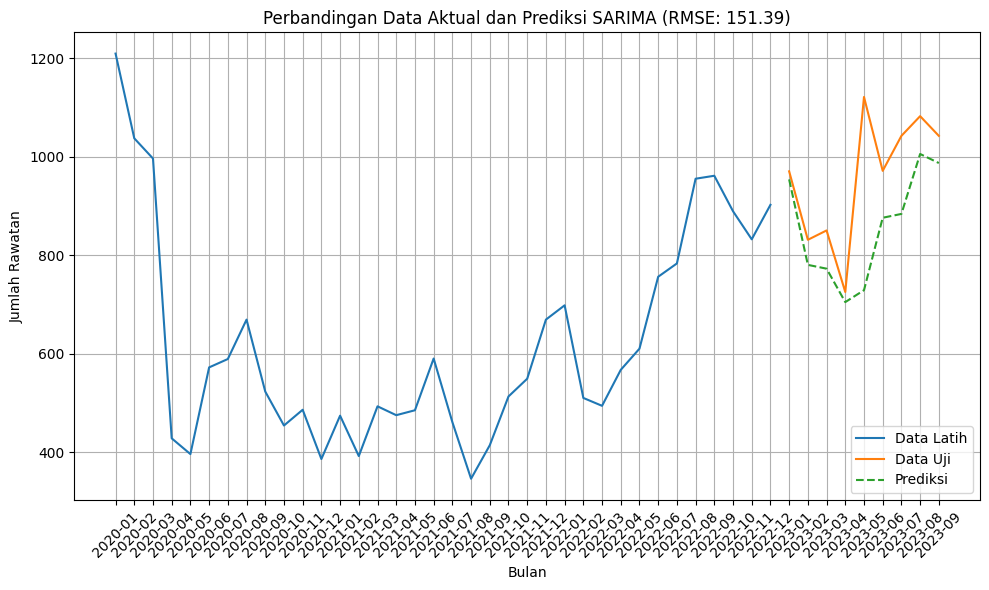

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Baca file CSV
df = pd.read_csv('fakta_rawatan.csv')

# 2. Ubah format kolom tanggal ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# 3. Hitung jumlah id_rawatan per bulan
df['bulan_tahun'] = df['tanggal'].dt.to_period('M')
data = df.groupby('bulan_tahun').size().reset_index(name='jumlah_rawatan')

# 4. Memisahkan data menjadi data latih dan data uji dengan rasio 80:20
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# 5. Melatih model SARIMA
model = SARIMAX(train['jumlah_rawatan'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# 6. Melakukan prediksi pada data uji
forecast = model_fit.forecast(steps=len(test))

# 7. Menghitung RMSE
rmse = np.sqrt(mean_squared_error(test['jumlah_rawatan'], forecast))

# 8. Menampilkan perbandingan data aktual dan hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(train['bulan_tahun'].dt.strftime('%Y-%m'), train['jumlah_rawatan'], label='Data Latih')
plt.plot(test['bulan_tahun'].dt.strftime('%Y-%m'), test['jumlah_rawatan'], label='Data Uji')
plt.plot(test['bulan_tahun'].dt.strftime('%Y-%m'), forecast, label='Prediksi', linestyle='--')
plt.title('Perbandingan Data Aktual dan Prediksi SARIMA (RMSE: {:.2f})'.format(rmse))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


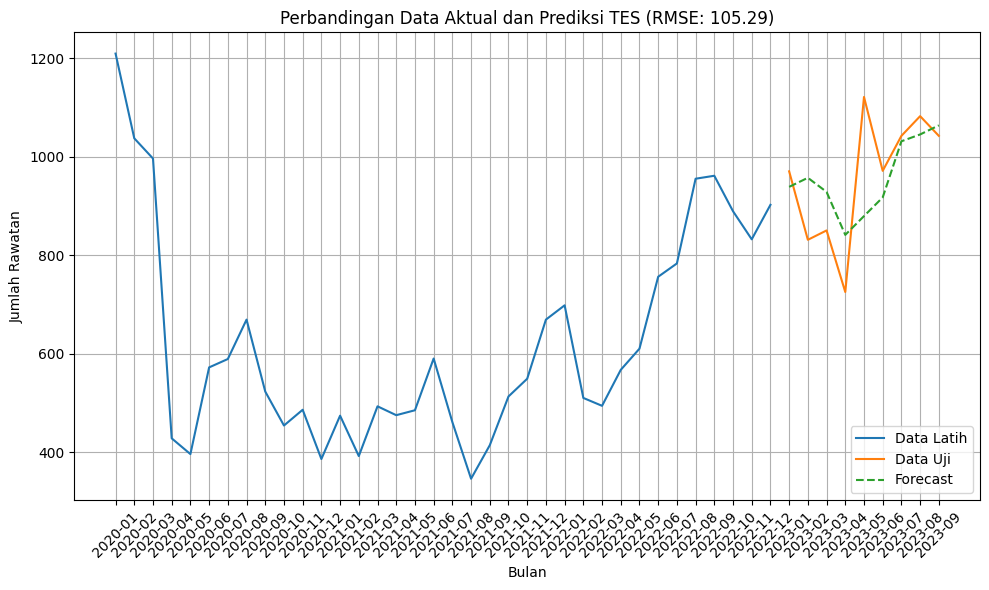

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# 1. Baca file CSV
df = pd.read_csv('Analytic/fakta_rawatan.csv')

# 2. Ubah format kolom tanggal ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# 3. Hitung jumlah id_rawatan per bulan
df['bulan_tahun'] = df['tanggal'].dt.to_period('M')
data = df.groupby('bulan_tahun').size().reset_index(name='jumlah_rawatan')

# 4. Bagi data menjadi data train dan data test dengan proporsi 80:20
train_size = int(len(data) * 0.8)
data_train = data[:train_size]
data_test = data[train_size:]

# 5. Pilih model Triple Exponential Smoothing dan fitting dengan data train
model = ExponentialSmoothing(data_train['jumlah_rawatan'], trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# 6. Lakukan forecasting untuk 12 bulan ke depan
forecast = model_fit.forecast(len(data_test))  # Menggunakan panjang data test

# 7. Hitung RMSE antara data test dan hasil forecasting
rmse = np.sqrt(mean_squared_error(data_test['jumlah_rawatan'], forecast))

# 8. Buat visualisasi data train, data test, dan hasil forecasting
plt.figure(figsize=(10, 6))
plt.plot(data_train['bulan_tahun'].astype(str), data_train['jumlah_rawatan'], label='Data Latih')
plt.plot(data_test['bulan_tahun'].astype(str), data_test['jumlah_rawatan'], label='Data Uji')
plt.plot(data_test['bulan_tahun'].astype(str), forecast, label='Forecast', linestyle='--')
plt.title('Perbandingan Data Aktual dan Prediksi TES (RMSE: {:.2f})'.format(rmse))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


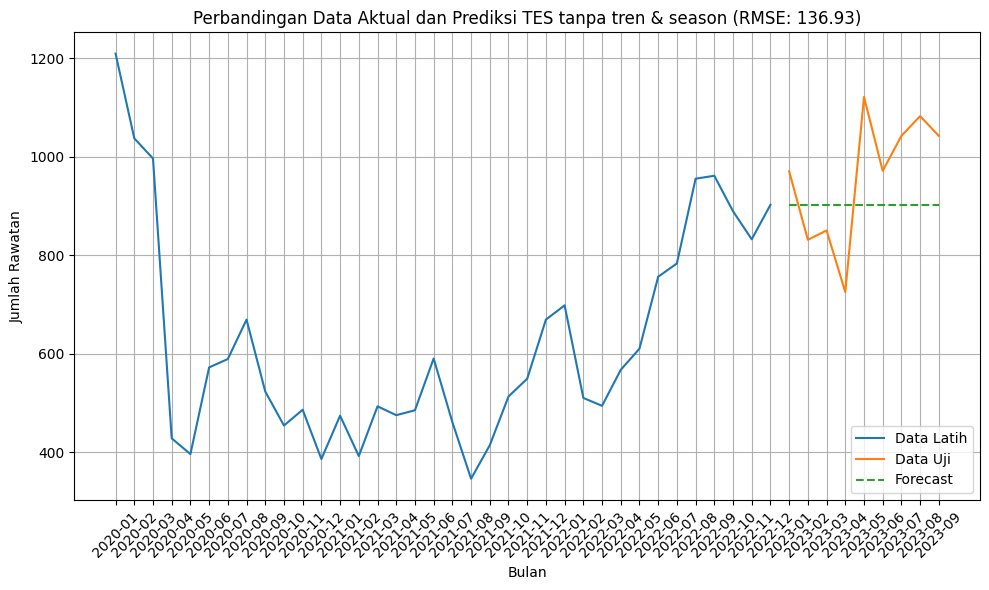

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# 1. Baca file CSV
df = pd.read_csv('fakta_rawatan.csv')

# 2. Ubah format kolom tanggal ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# 3. Hitung jumlah id_rawatan per bulan
df['bulan_tahun'] = df['tanggal'].dt.to_period('M')
data = df.groupby('bulan_tahun').size().reset_index(name='jumlah_rawatan')

# 4. Bagi data menjadi data train dan data test dengan proporsi 80:20
train_size = int(len(data) * 0.8)
data_train = data[:train_size]
data_test = data[train_size:]

# 5. Pilih model Triple Exponential Smoothing dan fitting dengan data train
model = ExponentialSmoothing(data_train['jumlah_rawatan'], trend=None, seasonal=None)
model_fit = model.fit()

# 6. Lakukan forecasting untuk 12 bulan ke depan
forecast = model_fit.forecast(len(data_test))  # Menggunakan panjang data test

# 7. Hitung RMSE antara data test dan hasil forecasting
rmse = np.sqrt(mean_squared_error(data_test['jumlah_rawatan'], forecast))

# 8. Buat visualisasi data train, data test, dan hasil forecasting
plt.figure(figsize=(10, 6))
plt.plot(data_train['bulan_tahun'].astype(str), data_train['jumlah_rawatan'], label='Data Latih')
plt.plot(data_test['bulan_tahun'].astype(str), data_test['jumlah_rawatan'], label='Data Uji')
plt.plot(data_test['bulan_tahun'].astype(str), forecast, label='Forecast', linestyle='--')
plt.title('Perbandingan Data Aktual dan Prediksi TES tanpa tren & season (RMSE: {:.2f})'.format(rmse))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


c:\Users\hanif\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


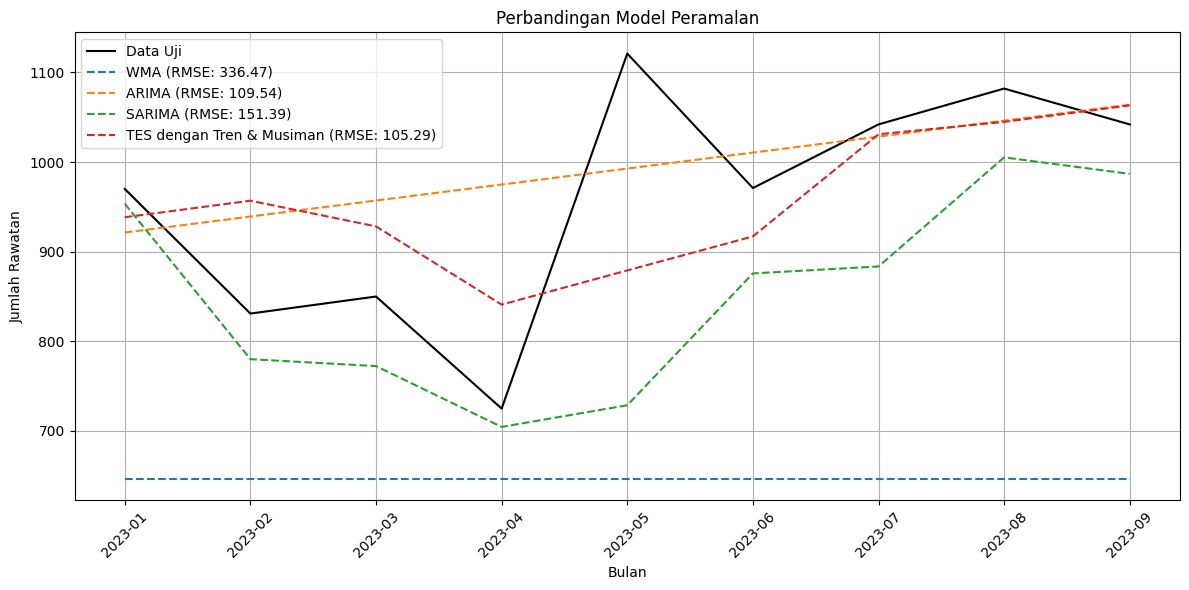

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Baca file CSV
df = pd.read_csv('Analytic/fakta_rawatan.csv')

# Ubah format kolom tanggal ke datetime
df['tanggal'] = pd.to_datetime(df['tanggal'])

# Hitung jumlah id_rawatan per bulan
df['bulan_tahun'] = df['tanggal'].dt.to_period('M')
data = df.groupby('bulan_tahun').size().reset_index(name='jumlah_rawatan')

# Bagi data menjadi data train dan data test dengan proporsi 80:20
train_size = int(len(data) * 0.8)
data_train = data[:train_size]
data_test = data[train_size:]

# Fungsi untuk menghitung Weighted Moving Average
def weighted_moving_average(data, weights):
    wma = np.convolve(data, weights[::-1], mode='valid') / sum(weights)
    return wma

# Pilih model Weighted Moving Average (WMA) dan fitting dengan data train
weights = np.arange(1, len(data_train) + 1)
wma_train = weighted_moving_average(data_train['jumlah_rawatan'], weights)
last_wma_value = wma_train[-1]
forecast_wma = np.full(len(data_test), last_wma_value)

# Hitung RMSE untuk WMA
rmse_wma = np.sqrt(mean_squared_error(data_test['jumlah_rawatan'], forecast_wma))

# Pilih model ARIMA dan fitting dengan data train
model_arima = ARIMA(data_train['jumlah_rawatan'], order=(1, 2, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(len(data_test))

# Hitung RMSE untuk ARIMA
rmse_arima = np.sqrt(mean_squared_error(data_test['jumlah_rawatan'], forecast_arima))

# Pilih model SARIMA dan fitting dengan data train
model_sarima = SARIMAX(data_train['jumlah_rawatan'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()
forecast_sarima = model_fit_sarima.forecast(steps=len(data_test))

# Hitung RMSE untuk SARIMA
rmse_sarima = np.sqrt(mean_squared_error(data_test['jumlah_rawatan'], forecast_sarima))

# Pilih model Triple Exponential Smoothing (TES) dengan tren dan musiman (seasonal) dan fitting dengan data train
model_tes_seasonal = ExponentialSmoothing(data_train['jumlah_rawatan'], trend='add', seasonal='add', seasonal_periods=7)
model_fit_tes_seasonal = model_tes_seasonal.fit()
forecast_tes_seasonal = model_fit_tes_seasonal.forecast(len(data_test))

# Hitung RMSE untuk TES dengan tren dan musiman
rmse_tes_seasonal = np.sqrt(mean_squared_error(data_test['jumlah_rawatan'], forecast_tes_seasonal))

# Pilih model Triple Exponential Smoothing (TES) tanpa tren dan musiman (seasonal) dan fitting dengan data train
model_tes_none = ExponentialSmoothing(data_train['jumlah_rawatan'], trend=None, seasonal=None)
model_fit_tes_none = model_tes_none.fit()
forecast_tes_none = model_fit_tes_none.forecast(len(data_test))

# Hitung RMSE untuk TES tanpa tren dan musiman
rmse_tes_none = np.sqrt(mean_squared_error(data_test['jumlah_rawatan'], forecast_tes_none))

# Buat visualisasi perbandingan
plt.figure(figsize=(12, 6))

plt.plot(data_test['bulan_tahun'].astype(str), data_test['jumlah_rawatan'], label='Data Uji', color='black')
plt.plot(data_test['bulan_tahun'].astype(str), forecast_wma, label='WMA (RMSE: {:.2f})'.format(rmse_wma), linestyle='--')
plt.plot(data_test['bulan_tahun'].astype(str), forecast_arima, label='ARIMA (RMSE: {:.2f})'.format(rmse_arima), linestyle='--')
plt.plot(data_test['bulan_tahun'].astype(str), forecast_sarima, label='SARIMA (RMSE: {:.2f})'.format(rmse_sarima), linestyle='--')
plt.plot(data_test['bulan_tahun'].astype(str), forecast_tes_seasonal, label='TES dengan Tren & Musiman (RMSE: {:.2f})'.format(rmse_tes_seasonal), linestyle='--')

plt.title('Perbandingan Model Peramalan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rawatan')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
